In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
dt=pd.read_csv("car data.csv")
dt.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
dt.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
dt['Age']=2024-dt['Year']

In [16]:
dt.drop(['Year'],axis=1,inplace=True)

In [17]:
print(dt['Selling_type'].unique())
print(dt['Transmission'].unique())
print(dt['Owner'].unique())
print(dt['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [18]:
dt.head(4)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13


In [19]:
#encoding categorical data 
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical variable
dt['Seller_type'] = label_encoder.fit_transform(dt['Selling_type'])
dt['Trans'] = label_encoder.fit_transform(dt['Transmission'])
dt['owner_new'] = label_encoder.fit_transform(dt['Owner'])
dt['Fuel_type'] = label_encoder.fit_transform(dt['Fuel_Type'])




In [20]:
dtnew=dt.drop(['Car_Name','Selling_type','Fuel_Type','Transmission','Owner'],axis=1)
dtnew.head()

,Selling_Price,Present_Price,Driven_kms,Age,Seller_type,Trans,owner_new,Fuel_type
0,3.35,5.59,27000,10,0,1,0,2
1,4.75,9.54,43000,11,0,1,0,1
2,7.25,9.85,6900,7,0,1,0,2
3,2.85,4.15,5200,13,0,1,0,2
4,4.60,6.87,42450,10,0,1,0,1


In [21]:
X=dtnew.drop(['Selling_Price'],axis=1)
y=dtnew['Selling_Price']


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [24]:
regr=RandomForestRegressor()
random_grid = {'n_estimators': [100,200,300],
               'max_features': ['sqrt','log2'],
               'max_depth': [5,10,15],
               'min_samples_split': [2,5,10,15,100],
               'min_samples_leaf': [1,2,5,10]}
rf = RandomizedSearchCV(regr, param_distributions=random_grid, n_iter=75, cv=5, random_state=42,error_score='raise')




In [ ]:
rf.fit(x_train,y_train)

In [ ]:
predictions=rf.predict(x_test)

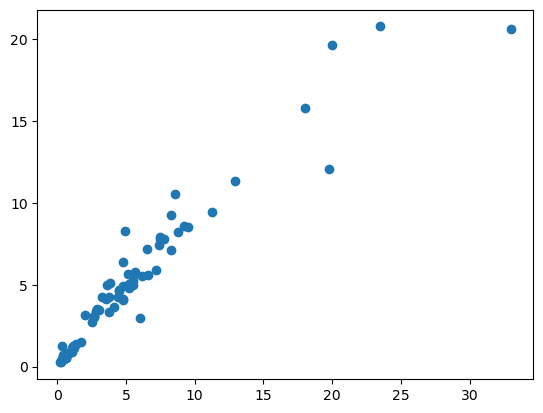

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [28]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score :",r)

R2 score : 0.8863988109486544
